In [28]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [31]:
import keras

# Keras 패키지를 이용한 신경망 구현

- 케라스(Keras)는 파이썬으로 작성된 오픈 소스 신경망 라이브러리이다. MXNet, Deeplearning4j, 텐서플로, Microsoft Cognitive Toolkit 또는 Theano 위에서 수행할 수 있다. 딥 신경망과의 빠른 실험을 가능케 하도록 설계되었으며 최소한의 모듈 방식의 확장 가능성에 초점을 둔다. 
- 신경망을 구성하기 위한 각 구성요소를 클래스로 제공하기 때문에 이를 간단히 연결하기만 하면 신경망을 구현할 수 있다.

> ### 케라스 설치
- conda install tensorflow
- conda install keras

여기에서는 MNIST 데이터를 사용하여 신경망을 구현하는 예를 보인다. 신경망의 구조는 다음 그림과 같다.

<img src="https://datascienceschool.net/upfiles/90f2752671424cef846839b89ddcf6aa.png" align="left">

In [32]:
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [33]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


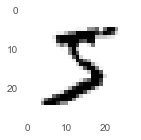

In [34]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0])
plt.grid(False)

In [35]:
X_train0[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

- 데이터를 float 타입으로 바꾸고 스케일링한다.
    - 수치 연산에 int 잘형은 적합하지 않다.

In [36]:
X_train0[0].shape

(28, 28)

In [37]:
X_train0.shape

(60000, 28, 28)

In [38]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0   ## 이미지 하나의 크기는 28 x 28 이므로 
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


- y 데이터는 One-Hot-Encoding 을 한다.
    - 분류모델로만 사용되는 classifier들을 사용할 때는 y 값에는 encoding을 해주지 않아도 된다.

In [39]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [40]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)   ## One-Hot-Encoding
Y_test = np_utils.to_categorical(y_test0, 10)

Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Random Forest
- base line

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train, y_train0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
print('랜덤포레스트 정확도 : ', rf.score(X_test, y_test0))

랜덤포레스트 정확도 :  0.9488


--------

## 신경망 구현 순서

Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. ``Sequential`` 모형 클래스 객체 생성
1. ``add`` 메서드로 layer 추가. 
   * ``Dense`` layer 가 가장 일반적인 신경망
   * 입력단부터 순차적으로 추가한다.
   * 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
   * 최초의 레이어는 ``input_dim`` 인수로 입력 크기를 설정해야 한다.
   * ``activation`` 인수로 activation 함수 설정
1. ``compile`` 메서드로 모형 완성. 
   * ``loss``인수로 Loss 함수 설정
   * ``optimizer`` 인수로 최적화 알고리즘 설정
   * ``metrics`` 인수로 트레이닝 단계에서 기록할 성능 기준 설정
1. ``fit`` 메서드로 트레이닝
   * ``nb_epoch`` 로 epoch 횟수 설정
   * ``batch_size`` 로 mini batch size 설정
   * ``metrics`` 인수로 설정한 성능 기준 기록을 출력으로 반환 

In [45]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
# model.add(Dense(15, input_dim=15, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

만들어진 모형은 ``model_to_dot`` 명령으로 그래프 형태를 보거나 모델 내부의 ``layers`` 리스트를 살펴봄으로써 내부 구조를 확인할 수 있다.

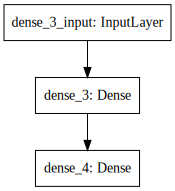

In [46]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

``fit`` 메서드로 트레이닝을 할 수 있다.

In [54]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=10, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.0216 - acc: 0.8959 - val_loss: 0.0208 - val_acc: 0.9015
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.0214 - acc: 0.8969 - val_loss: 0.0205 - val_acc: 0.9026
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0211 - acc: 0.8977 - val_loss: 0.0203 - val_acc: 0.9029
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.0209 - acc: 0.8985 - val_loss: 0.0201 - val_acc: 0.9027
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0207 - acc: 0.8990 - val_loss: 0.0199 - val_acc: 0.9026
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0205 - acc: 0.8999 - val_loss: 0.0197 - val_acc: 0.9035
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0203 - acc: 0.9005 - val_loss: 0.0195 - val_acc: 0.9043
Epoch 8/10
60000/60000 [==============================] - 1s 

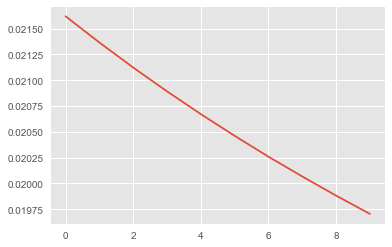

In [55]:
plt.plot(hist.history['loss'])
plt.show()

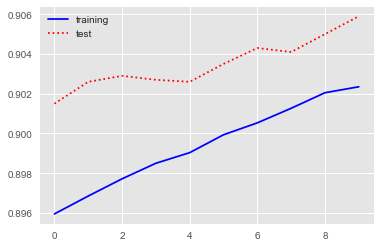

In [56]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

## 모형의 사용

트레이닝이 끝난 모형은 ``predict`` 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 ``predict_classes`` 메서드로 classification을 할 수 있다.

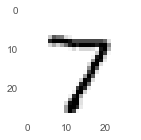

In [57]:
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0])
plt.grid(False)
plt.show()

In [58]:
model.predict(X_test[:1, :])

array([[0.00844957, 0.00761378, 0.01018847, 0.02409027, 0.00604938,
        0.03502339, 0.00777465, 0.96166074, 0.00291439, 0.02318165]],
      dtype=float32)

In [59]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

In [60]:
y_test0[0]

7

## 모형의 저장

트레이닝이 끝난 모형은 ``save`` 메서드로 가중치와 함께 hdf5 형식으로 저장하였다가 나중에 ``load`` 명령으로 불러 사용할 수 있다.

In [ ]:
model.save('my_model.hdf5')
del model

In [ ]:
from keras.models import load_model

model2 = load_model('my_model.hdf5')
model2.predict_classes(X_test[:1, :], verbose=0)